In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
## Cargo los embeddings
import pyarrow.parquet as pq
parquet_file_path = r'C:\Users\nunez\Facultad\Factor Data\Embeddings\rock_nacional_w_embeddings.parquet'

columns_to_load = ["sentence_embeddings","Track_ID"]
table = pq.read_table(parquet_file_path, columns=columns_to_load)
df = table.to_pandas()
del table
df_1 = pd.DataFrame(df['sentence_embeddings'].to_list())
df_2 = df["Track_ID"]
del df


df = pd.concat([df_1, df_2], axis=1)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,Track_ID
0,0.285478,-0.267780,0.419370,-0.498186,0.542660,0.023841,-0.413265,-0.031106,0.037016,-0.089733,...,0.053731,-0.071965,-0.196012,-0.272531,-0.218975,0.226477,-0.190769,0.270417,-0.245182,3oqWr0jDWNXxWufNogGREp
1,0.005152,-0.338731,0.156136,-0.549878,0.695794,0.311146,-0.125933,-0.057170,-0.142586,-0.237876,...,0.050056,-0.013978,-0.242019,-0.162937,-0.217069,0.228585,-0.211428,0.152560,-0.290909,6gwaa6ElIixNTvu6RwkMyo
2,0.116819,-0.197075,0.522070,-0.512381,0.799792,0.214954,-0.282300,0.112953,-0.276646,-0.476294,...,-0.097296,-0.053955,-0.135379,-0.325609,-0.221731,0.388578,0.004549,0.260015,-0.495187,1rh4kDY9T4fHVDum8Foi5k
3,0.064937,-0.105588,0.331254,-0.469864,0.336095,0.206220,-0.359127,-0.268113,0.054264,-0.154883,...,0.032132,-0.176046,-0.018010,-0.372751,-0.036383,0.301428,-0.064544,0.210582,-0.569920,12uaDRCVrgu4O6AyOZLrxG
4,0.100418,-0.234218,0.355078,-0.581577,0.777377,0.154805,-0.313815,0.036311,-0.163821,-0.168941,...,-0.000433,-0.007743,-0.323721,-0.179224,-0.251005,0.338842,-0.198423,0.395761,-0.336876,17eJyYLIlMNlOqcwHYJ9F2


In [3]:
## Aplico dimensionality reduction a los embeddings
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(df.drop(columns=["Track_ID"]))
reduced_embeddings

array([[-0.70592296, -0.46820948,  0.39341143],
       [-0.78844464, -0.40233395,  0.65946025],
       [ 0.20202598, -0.39595258,  1.2388065 ],
       ...,
       [ 1.746436  , -2.4819503 , -1.0416726 ],
       [ 2.3462796 , -2.404746  , -1.7795093 ],
       [ 0.07583295, -1.1839668 , -0.99682486]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


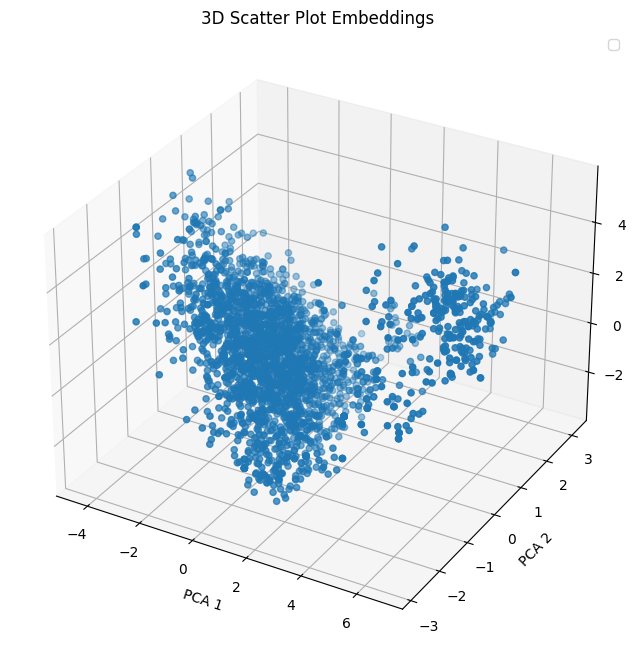

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_embeddings[:,0], reduced_embeddings[:,2], reduced_embeddings[:,1])

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('3D Scatter Plot Embeddings')
plt.legend()
plt.show()

In [5]:
from sklearn.cluster import KMeans
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(reduced_embeddings)
cluster_labels = kmeans.labels_


C:\Users\nunez\Work\DataSpell\Venvs\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
df = pd.concat([pd.Series(cluster_labels, name='Cluster_Labels'),df["Track_ID"], pd.DataFrame(reduced_embeddings)], axis=1)
df

,Cluster_Labels,Track_ID,0,1,2
0,0,3oqWr0jDWNXxWufNogGREp,-0.705923,-0.468209,0.393411
1,0,6gwaa6ElIixNTvu6RwkMyo,-0.788445,-0.402334,0.659460
2,0,1rh4kDY9T4fHVDum8Foi5k,0.202026,-0.395953,1.238806
3,0,12uaDRCVrgu4O6AyOZLrxG,-1.274808,0.421185,2.005244
4,0,17eJyYLIlMNlOqcwHYJ9F2,-1.264537,0.414769,1.349889
...,...,...,...,...,...
2564,1,2BOhm1YiL4UbVpLHulm3Fp,6.353597,2.107979,0.816090
2565,1,3aazT0KqFmg8kkJCmXqDJV,3.331736,2.105412,-1.109890
2566,0,49bT0U3Ug059MXsBYrUWda,1.746436,-2.481950,-1.041673
2567,0,6RcII8epzXd254KF82RhAp,2.346280,-2.404746,-1.779509


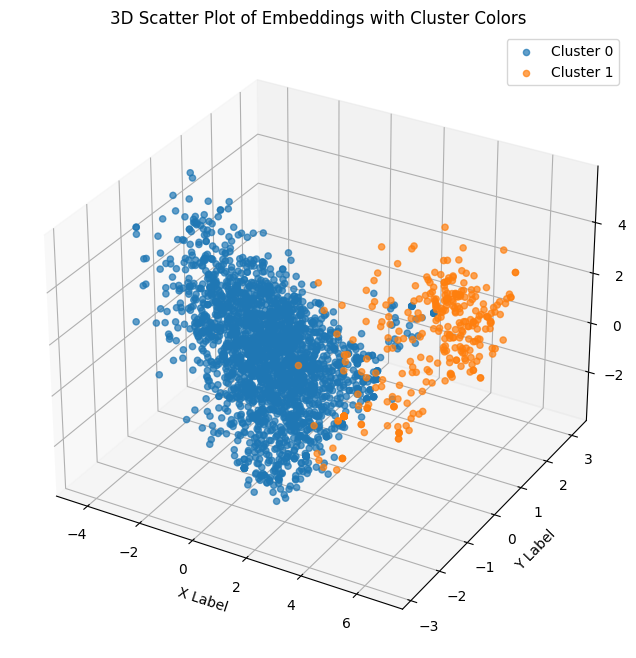

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate through clusters and plot data points with corresponding colors
for cluster_label in df['Cluster_Labels'].unique():
    mask = df[df["Cluster_Labels"] == cluster_label]
    ax.scatter(mask[0], mask[2], mask[1], label=f'Cluster {cluster_label}', alpha=0.7)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title('3D Scatter Plot of Embeddings with Cluster Colors')
plt.legend()
plt.show()

### El cluster 0 corresponde a canciones en inglés mientras que el 1 en español

In [8]:
df1 = pd.read_csv(r"C:\Users\nunez\Facultad\Factor Data\Proyecto NLP canciones\Datasets Scrapeados\Rock_Nacional.csv")
df = pd.merge(df,df1,on="Track_ID")
df

,Cluster_Labels,Track_ID,0,1,2,Unnamed: 0,Artist,Artist_ID,Artist_genres,Artist_popularity,Track,Track_release_date,Track_popularity,Lyrics,features_dict
0,0,3oqWr0jDWNXxWufNogGREp,-0.705923,-0.468209,0.393411,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Crimen,2006-04-04,75.0,"22 ContributorsCrimen Lyrics[Letra de ""Crimen""...",NaN
1,0,6gwaa6ElIixNTvu6RwkMyo,-0.788445,-0.402334,0.659460,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Puente,1999-06-01,71.0,25 ContributorsTranslationsEnglishPuente Lyric...,NaN
2,0,1rh4kDY9T4fHVDum8Foi5k,0.202026,-0.395953,1.238806,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Adiós,2006-04-04,73.0,"16 ContributorsAdiós Lyrics[Letra de ""Adiós""]\...","{'danceability': 0.495, 'energy': 0.596, 'key'..."
3,0,12uaDRCVrgu4O6AyOZLrxG,-1.274808,0.421185,2.005244,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Bocanada,1999-06-01,64.0,"14 ContributorsBocanada Lyrics[Letra de ""Bocan...","{'danceability': 0.47, 'energy': 0.575, 'key':..."
4,0,17eJyYLIlMNlOqcwHYJ9F2,-1.264537,0.414769,1.349889,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Lago en el Cielo,2006-04-04,68.0,15 ContributorsLago en el Cielo Lyrics[Letra d...,"{'danceability': 0.539, 'energy': 0.833, 'key'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,1,2BOhm1YiL4UbVpLHulm3Fp,6.353597,2.107979,0.816090,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,Otoño - En Vivo,2016-05-06,46.0,1 ContributorEpithalamium LyricsDo you remembe...,"{'danceability': 0.547, 'energy': 0.838, 'key'..."
2603,1,3aazT0KqFmg8kkJCmXqDJV,3.331736,2.105412,-1.109890,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,Hablan,2007-05-01,46.0,1 ContributorLove and Reggea ft Dread Mar I Ly...,"{'danceability': 0.773, 'energy': 0.412, 'key'..."
2604,0,49bT0U3Ug059MXsBYrUWda,1.746436,-2.481950,-1.041673,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,Sálvame - En Vivo,2016-05-06,47.0,2 ContributorsLyrics Lyrics[Rimas]\nTe convert...,"{'danceability': 0.562, 'energy': 0.742, 'key'..."
2605,0,6RcII8epzXd254KF82RhAp,2.346280,-2.404746,-1.779509,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,Tu Sin Mi - En Vivo,2016-05-06,45.0,4 ContributorsLatinoAmericans Lyrics[Letra de ...,"{'danceability': 0.578, 'energy': 0.689, 'key'..."


In [9]:
## Me quedo con una lista de los clusters significantes, los que están en español
df[df['Cluster_Labels'] == 0]["Track_ID"].to_excel(r"C:\Users\nunez\Facultad\Factor Data\Embeddings\Lista_Tracks_Español.xlsx")

## Limpio los archivos originales

In [10]:

import pyarrow.parquet as pq
parquet_file_path = r'C:\Users\nunez\Facultad\Factor Data\Embeddings\rock_nacional_w_embeddings.parquet'
table = pq.read_table(parquet_file_path)
df = table.to_pandas()
del table

clean_tracks = pd.read_excel(r"C:\Users\nunez\Facultad\Factor Data\Embeddings\Lista_Tracks_Español.xlsx")
df = pd.merge(df,clean_tracks,on="Track_ID",how="inner")
df.to_parquet(r"C:\Users\nunez\Facultad\Factor Data\Embeddings\clean_rock_nacional_w_embeddings.parquet", engine="pyarrow")
df

,Unnamed: 0_x,Artist,Artist_ID,Artist_genres,Artist_popularity,Track,Track_ID,Track_release_date,Track_popularity,Lyrics,features_dict,word_embeddings,sentence_embeddings,Unnamed: 0_y
0,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Crimen,3oqWr0jDWNXxWufNogGREp,2006-04-04,75.0,la espera me agotó no sé nada de vos dejast...,None,"[[0.58316207, -0.2548763, 0.5817932, -0.552530...","[0.28547838, -0.26778036, 0.41937047, -0.49818...",0
1,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Puente,6gwaa6ElIixNTvu6RwkMyo,1999-06-01,71.0,hoy te busqué en la rima que duerme con tod...,None,"[[0.27712262, -0.22966349, 0.47557557, -0.7245...","[0.00515183, -0.3387311, 0.15613599, -0.549877...",1
2,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Adiós,1rh4kDY9T4fHVDum8Foi5k,2006-04-04,73.0,suspiraban lo mismo los dos y hoy son parte...,"{'danceability': 0.495, 'energy': 0.596, 'key'...","[[0.3018511, -0.2504684, 0.85548764, -0.462000...","[0.11681878, -0.19707525, 0.52206975, -0.51238...",2
3,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Bocanada,12uaDRCVrgu4O6AyOZLrxG,1999-06-01,64.0,cuando no hay más que decirnos habla el hum...,"{'danceability': 0.47, 'energy': 0.575, 'key':...","[[0.31549487, 0.003480405, 0.771458, -0.640106...","[0.06493681, -0.10558776, 0.33125407, -0.46986...",3
4,0,Gustavo Cerati,1QOmebWGB6FdFtW7Bo3F0W,"['argentine rock', 'latin alternative', 'latin...",70,Lago en el Cielo,17eJyYLIlMNlOqcwHYJ9F2,2006-04-04,68.0,un lago en el cielo quiero ser suave para e...,"{'danceability': 0.539, 'energy': 0.833, 'key'...","[[0.39435253, -0.1032096, 0.77467644, -0.61168...","[0.10041767, -0.23421776, 0.35507822, -0.58157...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,Tu Soldado,2MoFgRCvQMBy6cgw55oQvV,2012-11-01,48.0,oh sí hoy me quieren convencer para que caig...,"{'danceability': 0.699, 'energy': 0.271, 'key'...","[[0.25360453, -0.22540121, 0.27634227, -0.3830...","[0.01724466, -0.28228804, 0.084647946, -0.5426...",2600
2365,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,La Suerte,2axmxXWKBu2zEa1d8hrQVD,2018-05-18,48.0,letra de la suerte la suerte que tú creas na...,"{'danceability': 0.687, 'energy': 0.614, 'key'...","[[0.23009591, -0.43510795, 0.7198374, -0.40718...","[-0.074624635, -0.2719678, 0.104101434, -0.385...",2601
2366,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,Sálvame - En Vivo,49bT0U3Ug059MXsBYrUWda,2016-05-06,47.0,lyrics te convertí en una reina pa cualquier ...,"{'danceability': 0.562, 'energy': 0.742, 'key'...","[[0.02281683, -0.26722732, 0.49827793, -0.2618...","[-0.072813645, -0.33816, 0.36019236, -0.231474...",2604
2367,86,Dread Mar I,1aw0Cdl1DIrtUrUA6fGbAR,"['argentine reggae', 'latin alternative', 'roc...",69,Tu Sin Mi - En Vivo,6RcII8epzXd254KF82RhAp,2016-05-06,45.0,yeah yeah yeah vine a romper un beat que pu...,"{'danceability': 0.578, 'energy': 0.689, 'key'...","[[0.17208251, -0.28501275, 0.37805364, -0.3005...","[0.070230864, -0.35557938, 0.29712877, -0.2836...",2605


In [11]:

import pyarrow.parquet as pq
parquet_file_path = r'C:\Users\nunez\Facultad\Factor Data\Embeddings\embeddings_list.parquet'
table = pq.read_table(parquet_file_path)
df = table.to_pandas()
del table

clean_tracks = pd.read_excel(r"C:\Users\nunez\Facultad\Factor Data\Embeddings\Lista_Tracks_Español.xlsx")
df = pd.merge(df,clean_tracks,on="Track_ID",how="inner")
df = df.explode(column=["Token","Vector"])
df.to_parquet(r"C:\Users\nunez\Facultad\Factor Data\Embeddings\clean_embeddings_list.parquet", engine="pyarrow")